# Familiarizing with data

In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
# Get directory
print(os.getcwd())

c:\Users\mate1\OneDrive\Escritorio\Repository\Eurovision_Contest_Analysis


In [9]:
initial_year = 1957
final_year = 2023

df_votes = pd.read_csv('data/votes.csv')
df_votes

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
51349,2023,final,wld,al,wld,al,6,6.0,NaN
51350,2023,final,wld,pt,wld,pt,0,0.0,NaN
51351,2023,final,wld,rs,wld,rs,0,0.0,NaN
51352,2023,final,wld,gb,wld,gb,0,0.0,NaN


In [10]:
years = df_votes['year']
years = np.array(years).flatten() # Convert to 1D array
years = np.unique(years) # Get unique years

countries = df_votes['from_country_id']
countries = np.array(countries).flatten() # Convert to 1D array
countries = np.unique(countries) # Get unique countries

print(years)
print(countries)
print('Number of years:', len(years))
print('Number of countries:', len(countries))


[1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2021 2022 2023]
['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 'ie' 'il' 'is'
 'it' 'lt' 'lu' 'lv' 'ma' 'mc' 'md' 'me' 'mk' 'mt' 'nl' 'no' 'pl' 'pt'
 'ro' 'rs' 'ru' 'se' 'si' 'sk' 'sm' 'tr' 'ua' 'wld' 'yu']
Number of years: 66
Number of countries: 53


In [11]:
# Get the average number of points per country and remove countries with less than 1 average point in the final
country_points = np.zeros((len(countries)))
deleted_indexes = []
for i,country in enumerate(countries):
    number_of_points = 0
    for year in years:
        votes = df_votes[(df_votes['year'] == year) & (df_votes['to_country_id'] == country) & (df_votes['round'] == 'final')]
        number_of_points += votes['total_points'].sum()
    country_points[i] = number_of_points/len(years)
    if country_points[i] < 1:
        deleted_indexes.append(i)

countries = np.delete(countries, deleted_indexes)
country_points = np.delete(country_points, deleted_indexes)
        
print(countries)


['al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz' 'de'
 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 'ie' 'il' 'is' 'it'
 'lt' 'lu' 'lv' 'mc' 'md' 'me' 'mk' 'mt' 'nl' 'no' 'pl' 'pt' 'ro' 'rs'
 'ru' 'se' 'si' 'sm' 'tr' 'ua' 'yu']


In [12]:
print('The country with the most points is:', countries[np.argmax(country_points)], 'with an average of:', np.max(country_points))
print('The country with the least points is:', countries[np.argmin(country_points)], 'with an average of:', np.min(country_points))

The country with the most points is: se with an average of: 98.04545454545455
The country with the least points is: me with an average of: 1.2272727272727273


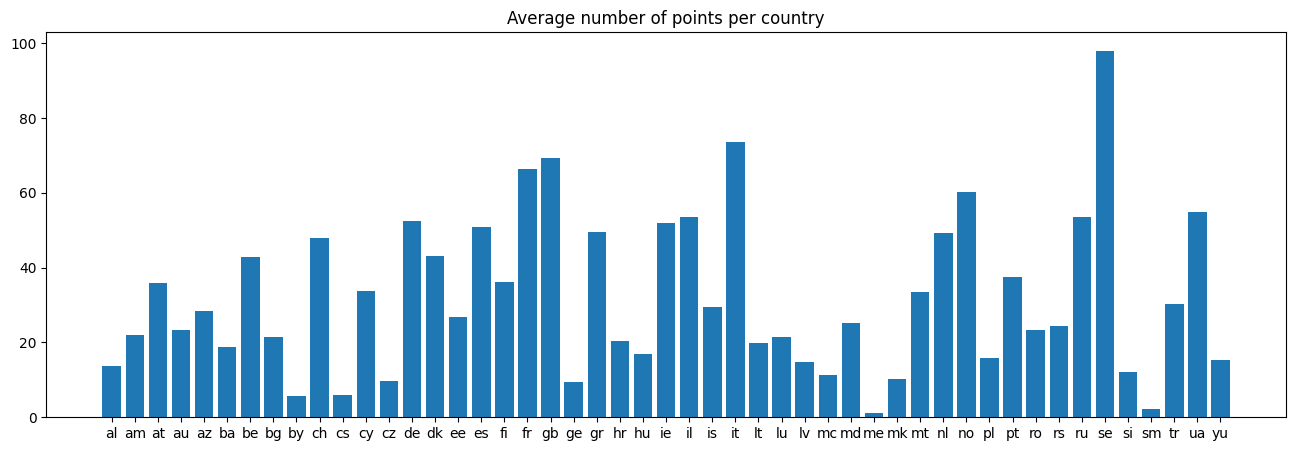

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

ax.set_title('Average number of points per country')
ax.bar(countries, country_points)
# rotate x labels, smaller font
plt.show()

In [14]:
# Get the total number of participations of each country
country_participations = np.zeros((len(countries)))
for i,country in enumerate(countries):
    number_of_participations = 0
    for year in years:
        if len(df_votes[(df_votes['year'] == year) & (df_votes['from_country_id'] == country) & (df_votes['round'] == 'final')]) > 0:
            number_of_participations += 1
    country_participations[i] = number_of_participations

print('The country with the most participations is:', countries[np.argmax(country_participations)], 'with a total of:', np.max(country_participations))
print('The country with the least participations is:', countries[np.argmin(country_participations)], 'with a total of:', np.min(country_participations))

The country with the most participations is: de with a total of: 65.0
The country with the least participations is: cs with a total of: 3.0


C:\Users\mate1\AppData\Local\Temp\ipykernel_14288\1489737606.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


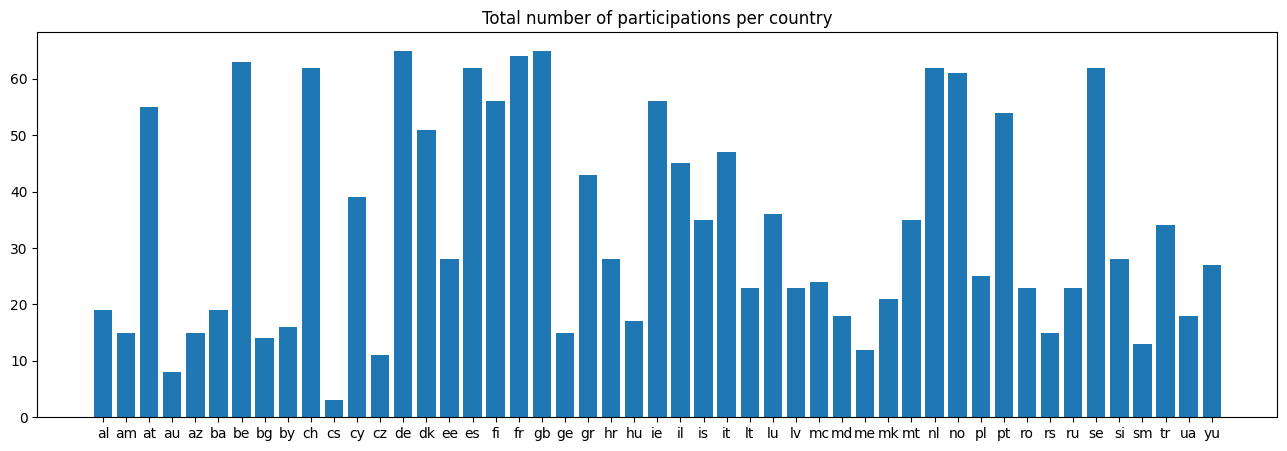

In [15]:
plt, ax = plt.subplots(1, 1, figsize=(16, 5))

ax.set_title('Total number of participations per country')
ax.bar(countries, country_participations)
plt.show()

In [16]:
# Get the total of wins of each country
country_wins = np.zeros((len(countries)))
for year in years:
    country_winner = 0
    for i,country in enumerate(countries):
        votes = df_votes[(df_votes['year'] == year) & (df_votes['to_country_id'] == country) & (df_votes['round'] == 'final')]
        country_votes = votes['total_points'].sum()
        if country_votes > country_winner:
            country_winner = country_votes
            winner = i
    country_wins[winner] += 1

print('The country with the most wins is:', countries[np.argmax(country_wins)], 'with a total of:', np.max(country_wins))
print('The country with the least wins is:', countries[np.argmin(country_wins)], 'with a total of:', np.min(country_wins))
        
    

The country with the most wins is: ie with a total of: 7.0
The country with the least wins is: al with a total of: 0.0


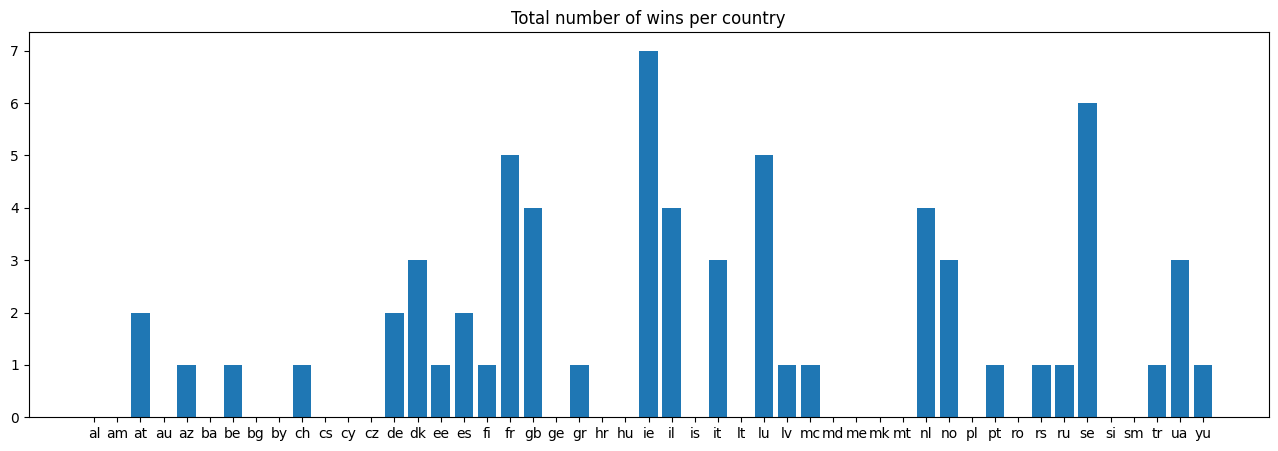

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

ax.set_title('Total number of wins per country')
ax.bar(countries, country_wins)
plt.show()

## Network analysis

In [59]:
def eurovision_network(year, round='final'):
    
    """This function creates a networkx graph with the votes of a given year and round."""
    
    df_votes = pd.read_csv('data/votes.csv')
    votes = df_votes[(df_votes['year'] == year) & (df_votes['round'] == round)]
    filtered_votes = votes[votes['total_points'] > 0]  # Filter out edges with zero weight
    G = nx.from_pandas_edgelist(filtered_votes, 'from_country_id', 'to_country_id', ['total_points'], create_using=nx.DiGraph)
    
    return G

In [60]:
year = 2019
G = eurovision_network(year)
# Check the graph edges with weights
for u, v, weight in G.edges(data=True):
    print(f"Edge from {u} to {v} with weight {weight['total_points']}")

G.number_of_nodes(), G.number_of_edges(), nx.number_of_selfloops(G)

Edge from al to nl with weight 7
Edge from al to it with weight 13
Edge from al to ru with weight 13
Edge from al to ch with weight 14
Edge from al to se with weight 6
Edge from al to no with weight 5
Edge from al to mk with weight 18
Edge from al to az with weight 11
Edge from al to au with weight 3
Edge from al to cy with weight 7
Edge from al to fr with weight 3
Edge from al to sm with weight 10
Edge from al to gr with weight 6
Edge from nl to it with weight 16
Edge from nl to ru with weight 5
Edge from nl to ch with weight 16
Edge from nl to se with weight 20
Edge from nl to no with weight 12
Edge from nl to mk with weight 4
Edge from nl to az with weight 4
Edge from nl to au with weight 4
Edge from nl to is with weight 7
Edge from nl to cz with weight 4
Edge from nl to dk with weight 12
Edge from nl to cy with weight 1
Edge from nl to mt with weight 8
Edge from nl to es with weight 3
Edge from it to nl with weight 5
Edge from it to ru with weight 8
Edge from it to ch with weight 3

(41, 589, 0)

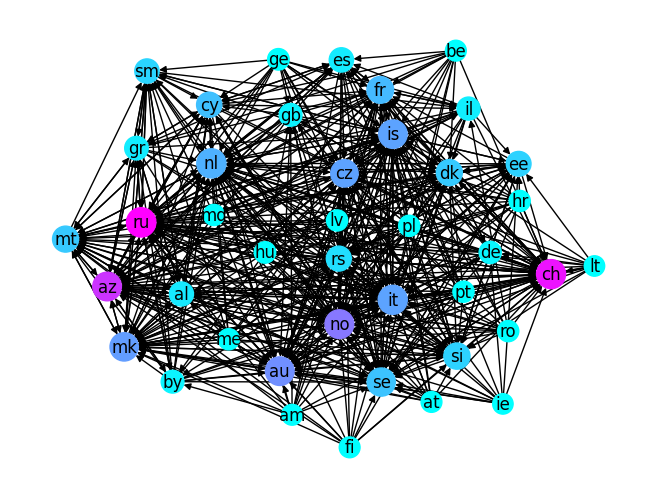

In [61]:
node_betweenness = [x for k,x in nx.betweenness_centrality(G).items()] # Get the betweenness of each node
node_deg = np.array([k for x,k in dict(G.degree()).items()]) # Get the degree of each node

nx.draw(G, with_labels=True, node_color=node_betweenness,cmap='cool', node_size=60*np.sqrt(node_deg))

## Spain Analysis